In [1]:
from ptycho_v2.tools_v2.ptychography import Ptychography

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch 
import numpy as np

scale = 5
max_scale = 7
device = 'cuda:0'

multiplier = 2**(-2 * scale)
multiplier = 1
vec = torch.arange(0, 2**max_scale) * (2**(-scale))
sinc_exp = torch.sinc(vec) * torch.exp(-1j * np.pi * vec)
result = sinc_exp.view(-1, 1) @ sinc_exp.view(1, -1)
multipliers = result * multiplier

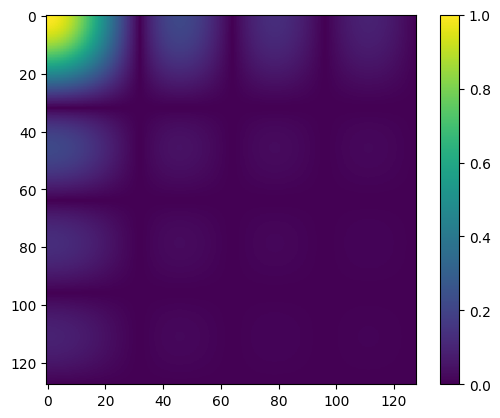

In [9]:
import matplotlib.pyplot as plt

plt.imshow(np.abs(multipliers.cpu().numpy()))
plt.colorbar()

In [ ]:
import numpy as np

def construct_probe(shape, probe_radius=10):
    """
    Constructs a 2D probe with a specified radius.

    Parameters:
    - shape (tuple): Shape of the 2D array (height, width).
    - probe_radius (int): Radius of the probe (size of the square region to set to 1).

    Returns:
    - probe (numpy array): A 2D array with a square probe of ones at the center.
    """
    probe = np.zeros(shape)
    center_x, center_y = shape[0] // 2, shape[1] // 2
    start_x, end_x = center_x - probe_radius // 2, center_x + probe_radius // 2
    start_y, end_y = center_y - probe_radius // 2, center_y + probe_radius // 2
    probe[start_x:end_x, start_y:end_y] = 1
    return probe

In [ ]:
shape = (512,512)
probe_radius = 128
probe = construct_probe(shape, probe_radius)

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(a)

In [ ]:
# 0 - 255 
# 256 - 511
# 192 - 255
# 256 - 319

In [ ]:
def generate_shifts(in_size, shift_amount):
    """
    Generates shifts for scanning based on the input size and shift amount.

    Parameters:
    - in_size (int): The size of the input image or region (assumes square region for simplicity).
    - shift_amount (int): Distance between consecutive shifts.

    Returns:
    - shifts (numpy array): Array of 2D shifts (vertical and horizontal).
    """
    # Calculate the range of shifts based on input size
    half_size = in_size // 2  # Half of the input size to define the range
    n_shifts = (2 * half_size // shift_amount) + 1  # Number of shifts along one axis

    # Generate shift values using linspace
    shifts = np.linspace(-half_size, half_size, n_shifts).astype(int)

    # Create a 2D grid of shifts
    shifts_h, shifts_v = np.meshgrid(shifts, shifts, indexing='ij')

    # Combine horizontal and vertical shifts into a single array
    return np.concatenate([shifts_v.reshape(-1, 1), shifts_h.reshape(-1, 1)], axis=1)

In [ ]:
shifts = generate_shifts(512, 32)

In [ ]:
shifts

In [ ]:
base_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])


In [ ]:
import torch
def create_shared_matrix(base_matrix, n):
        """
        Creates an mn x mn matrix consisting of n x n copies of the base m x m matrix.
        
        Parameters:
        - base_matrix (torch.Tensor): An m x m matrix of differentiable parameters.
        - n (int): Number of times the base matrix is repeated along each dimension.

        Returns:
        - shared_matrix (torch.Tensor): A new mn x mn matrix with shared parameters.
        """
        # Ensure base_matrix is a 2D tensor
        m = base_matrix.size(0)  # Base matrix size (assume square matrix m x m)
        assert base_matrix.size(1) == m, "Base matrix must be square."

        # Create the larger matrix with shared copies
        shared_matrix = torch.cat([torch.cat([base_matrix for _ in range(n)], dim=1) for _ in range(n)], dim=0)
        return shared_matrix


In [ ]:
matx = create_shared_matrix(torch.tensor(base_matrix), 3)

In [ ]:
matx